# 27/11/23 -  Understanding the AUC(Area under curve)-ROC(Reciever operator characteristics) Curve in Machine Learning Classification

- AUC-ROC is the valued metric used for evaluating the performance in classification models. 
- The AUC-ROC metric clearly helps determine and tell us about the capability of a model in distinguishing the classes. 
- The judging criteria being - Higher the AUC, better the model. 
- AUC-ROC curves are frequently used to depict in a graphical way the connection and trade-off between sensitivity and specificity for every possible cut-off for a test being performed or a combination of tests being performed. 
- The area under the ROC curve gives an idea about the benefit of using the test for the underlying question. AUC - ROC curves are also a performance measurement for the classification problems at various threshold settings. 

## The Performance Metrics for Classification

The metrics that one chooses to evaluate a machine learning model play an important role. The choice of metric influences how the performance of machine learning algorithms can be measured and compared. But, Metrics possess a slight difference from loss functions. Loss functions are meant to show the measure of model performance. They’re used to train a machine learning model, maybe using a kind of optimization like Gradient Descent, and are usually differentiable in the model’s parameters. Metrics on the other hand are used to monitor and evaluate the performance of a model during training and testing, not needing to be differentiable. The importance of various characteristics in the result will also be influenced completely by the metric.


## Confusion Matrix

One of the basic classification metrics is the Confusion Matrix. It is a tabular visualization of the truth labels versus the model’s predictions. Each row of the confusion matrix represents instances in a predicted class and each column represents instances in an actual class. Confusion Matrix is not entirely a performance metric but provides a basis on which other metrics can evaluate the results. There are 4 classes of a Confusion Matrix. The True Positive signifies how many positive class samples the created model has predicted correctly. True Negative signifies how many negative class samples the created model predicted correctly. False Positive signifies how many negative class samples the created model predicted incorrectly and vice versa goes for False Negative. 

## Precision-Recall and F1 Score

Precision-recall and F1 scores are the metrics for which the values are obtained from a confusion matrix as they are based on true and false classifications. The recall is also termed as the true positive rate or sensitivity, and precision is termed as the positive predictive value in classification.

## Accuracy Score

Accuracy in terms of Performance Metrics is the measure of correct prediction of the classifier compared to its overall data points. It is the ratio of the units of correct predictions and the total number of predictions made by the classifiers. These additional performance evaluations help out to derive more meaning from your model.

# AUC-ROC

AUC ROC is used to visualize the performance of a classification model based on its rate or correct and incorrect classifications. Further in this article, we will discuss in detail the AUC-ROC.

## What is a ROC?
Gives sensitivity
ROC curve, also known as Receiver Operating Characteristics Curve, is a metric used to measure the performance of a classifier model. The ROC curve depicts the **rate of true positives** with respect to the **rate of false positives**, therefore highlighting the sensitivity of the classifier model. The ROC is also known as a relative operating characteristic curve, as it is a comparison of two operating characteristics, the True Positive Rate and the False Positive Rate, as the criterion changes. An ideal classifier will have a ROC where the graph would hit a true positive rate of 100% with zero false positives. We generally measure how many correct positive classifications are being gained with an increment in the rate of false positives.  

ROC curve can be used to select a threshold for a classifier, which maximizes the true positives and in turn minimizes the false positives. ROC Curves help determine the exact trade-off between the true positive rate and false-positive rate for a model using different measures of probability thresholds. ROC curves are more appropriate to be used when the observations present are balanced between each class. This method was first used in signal detection but is now also being used in many other areas such as medicine, radiology, natural hazards other than machine learning. A discrete classifier returns only the predicted class and gives a single point on the ROC space. But for probabilistic classifiers, which give a probability or score that reflects the degree to which an instance belongs to one class rather than another, we can create a curve by changing the threshold for the score.

## What is an AUC? 

Area Under Curve or AUC is one of the most widely used metrics for model evaluation. It is generally used for binary classification problems. AUC measures the entire two-dimensional area present underneath the entire ROC curve. AUC of a classifier is equal to the probability that the classifier will rank a randomly chosen positive example higher than that of a randomly chosen negative example. The Area Under the Curve provides the ability for a classifier to distinguish between classes and is used as a summary of the ROC curve. The higher the AUC, it is assumed that the better the performance of the model at distinguishing between the positive and negative classes. 

## Decoding AUC-ROC Score

The area under the curve is one of the good ways to estimate the accuracy of the model. An excellent model poses an AUC near to the 1 which tells that it has a good measure of separability. A poor model will have an AUC near 0 which describes that it has the worst measure of separability. In fact, it means it is reciprocating the result and predicting 0s as 1s and 1s as 0s. When an AUC is 0.5, it means the model has no class separation capacity present whatsoever. 

## Obtaining AUC-ROC Curve in Python 

AUC-ROC can be easily performed in Python using Numpy. The metric can be implemented on different Machine Learning Models to explore the potential difference between the scores. Here I have inculcated the same on two models, namely logistic Regression and Gaussian Naive Bias.

    from sklearn.naive_bayes import GaussianNB
    model_naive = GaussianNB()
    model_naive.fit(X_train, y_train)
    
    from sklearn.metrics import roc_curve, auc
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    roc_auc

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,\
precision_score,recall_score,f1_score
from sklearn.metrics import roc_auc_score, roc_curve

## The Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [3]:
data = pd.read_csv('../dataset/titanic.csv')

In [4]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

<Axes: >

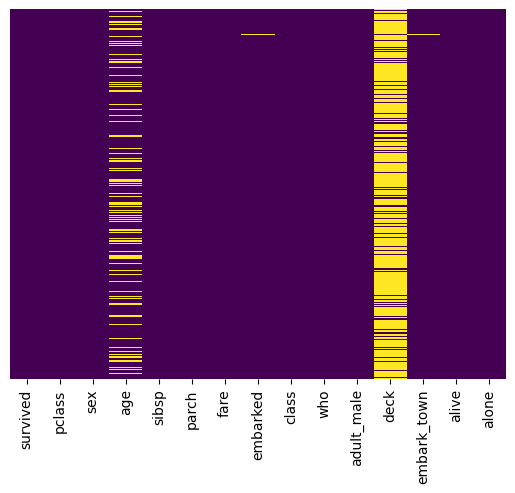

In [5]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

<Axes: xlabel='survived', ylabel='count'>

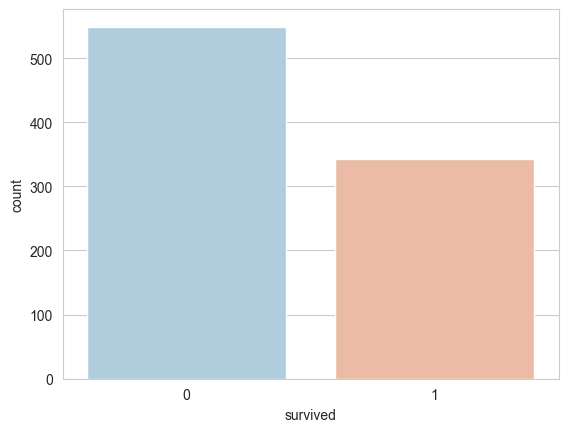

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='survived',data=data,palette='RdBu_r')

In [9]:
data.survived.value_counts(normalize=True)

survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

<Axes: xlabel='survived', ylabel='count'>

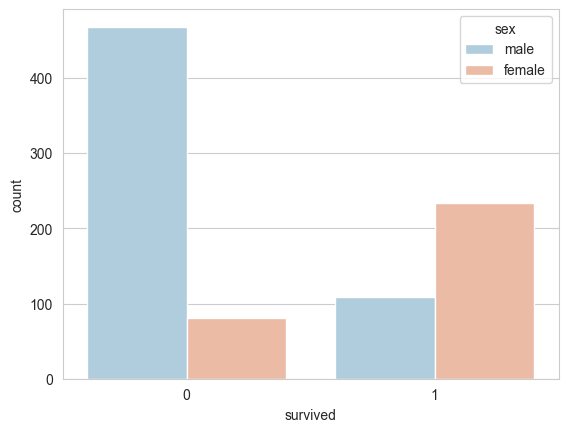

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='sex',data=data,palette='RdBu_r')

<Axes: xlabel='survived', ylabel='count'>

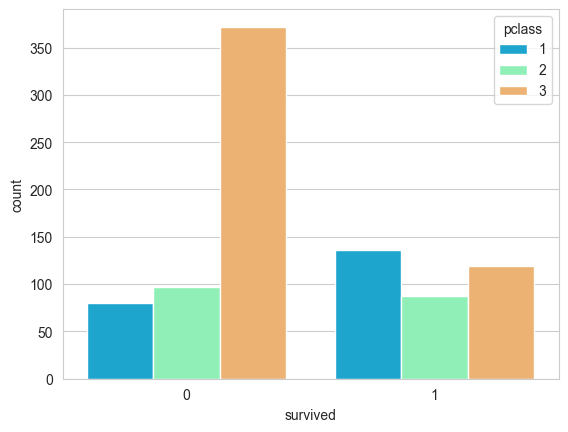

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='pclass',data=data,palette='rainbow')

C:\Users\adity\AppData\Local\Temp\ipykernel_19932\1536969848.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'].dropna(),kde=True,color='darkred',bins=30)


<Axes: xlabel='age', ylabel='Density'>

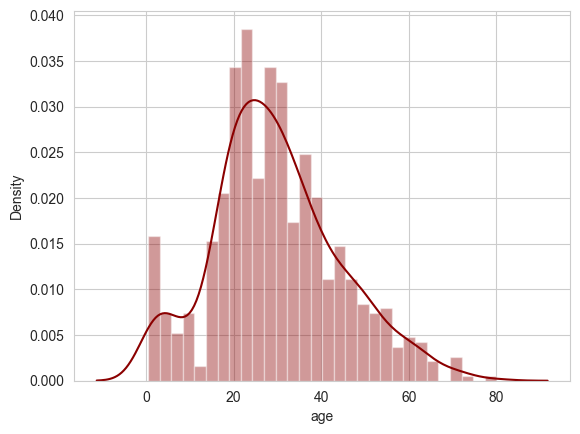

In [16]:
sns.distplot(data['age'].dropna(),kde=True,color='darkred',bins=30)

<Axes: xlabel='sibsp', ylabel='count'>

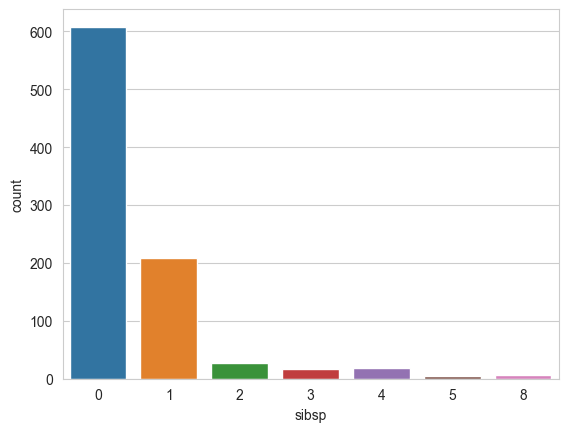

In [19]:
sns.countplot(x='sibsp',data=data)

<Axes: >

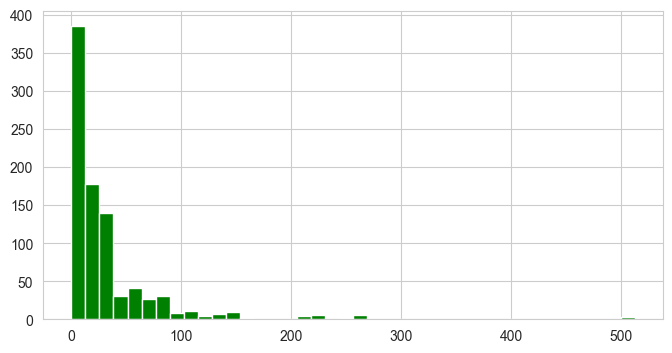

In [20]:
data['fare'].hist(color='green',bins=40,figsize=(8,4))

___
## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


<Axes: xlabel='pclass', ylabel='age'>

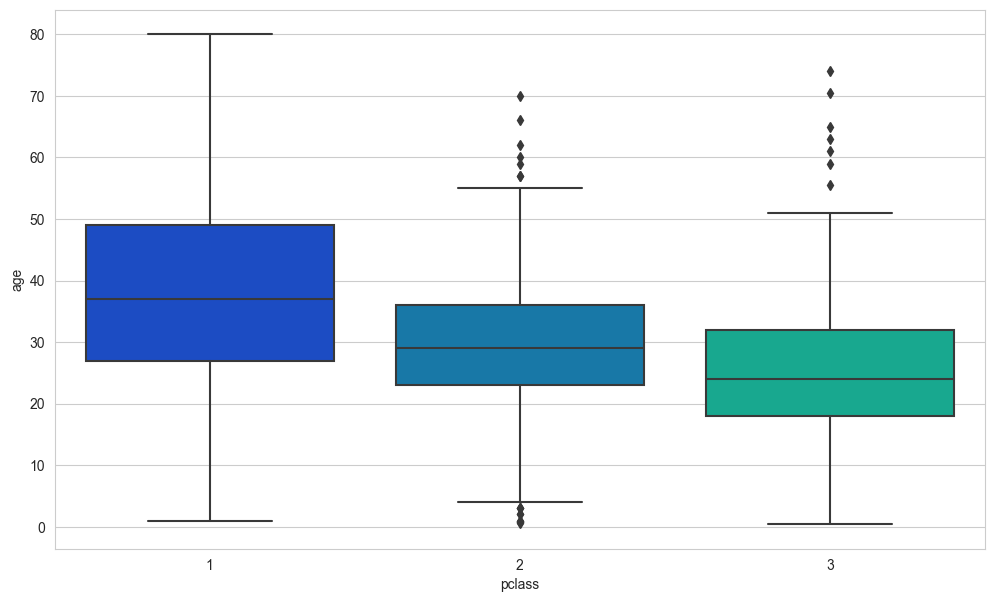

In [21]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='pclass',y='age',data=data,palette='winter')

In [22]:
data1 = data.copy()
data1.dropna(inplace=True)

Now let's check that heat map again!

In [23]:
data1.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [24]:
data1.shape

(182, 15)

## Extracting Feature Array & Taget Column

In [25]:
data1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


In [27]:
X = data1[['age','sibsp','parch','fare','pclass']] # Feature Array
y = data1['survived']                              # Target Column

Great! Our data is ready for our model!

# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

## Train Test Split

In [28]:
# Splitting data into Training & testing sets

X_tr,X_te,y_tr,y_te = \
train_test_split(X,y,test_size=0.25,random_state=42)

In [29]:
print("Total Rows in X: ", X.shape[0])
print("Total Rows in X_train: ", X_tr.shape[0])
print("Total Rows in X_test: ", X_te.shape[0])

Total Rows in X:  182
Total Rows in X_train:  136
Total Rows in X_test:  46


## Training and Predicting

In [30]:
# Building the model

regmod = LogisticRegression()

In [31]:
# Training the model

regmod.fit(X_tr,y_tr)

LogisticRegression()

In [32]:
y_pred = regmod.predict(X_te)
y_pred[:5]

array([1, 1, 1, 1, 1], dtype=int64)

## Evaluation

In [33]:
# Creating a confusion matrix

conf_matirx = confusion_matrix(y_te,y_pred)
conf_matirx

array([[ 3, 15],
       [ 0, 28]], dtype=int64)

## Visualizing Confusion Matrix

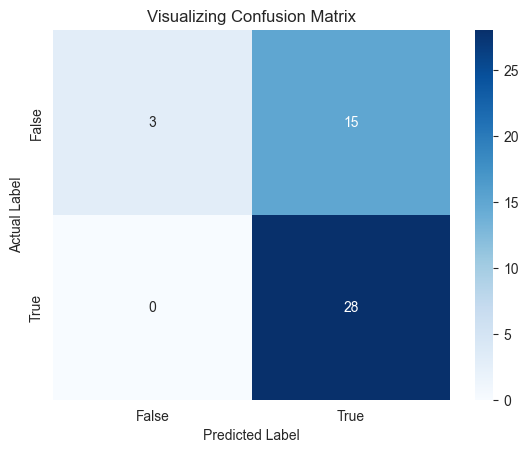

In [34]:
ax = sns.heatmap(conf_matirx,annot=True,cmap="Blues")
ax.set_title("Visualizing Confusion Matrix")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("Actual Label")

ax.xaxis.set_ticklabels(["False","True"])
ax.yaxis.set_ticklabels(["False","True"])

plt.show()

In [35]:
## Performance metrices

print("Acc Score ", accuracy_score(y_te,y_pred))
print("Pre Score ", precision_score(y_te,y_pred))
print("Rec Score ", recall_score(y_te,y_pred))
print("F1-Score ", f1_score(y_te,y_pred))

Acc Score  0.6739130434782609
Pre Score  0.6511627906976745
Rec Score  1.0
F1-Score  0.7887323943661972


In [36]:
confusion_matrix(y_te,y_pred,labels=[1,0])

array([[28,  0],
       [15,  3]], dtype=int64)

In [39]:
from sklearn.metrics import classification_report

In [41]:
print(classification_report(y_te,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.17      0.29        18
           1       0.65      1.00      0.79        28

    accuracy                           0.67        46
   macro avg       0.83      0.58      0.54        46
weighted avg       0.79      0.67      0.59        46



## Calculate the AUC

In [44]:


y_pred_proba = regmod.predict_proba(X_te)[::,1]
y_pred_proba

array([0.92405121, 0.56468736, 0.87710241, 0.61686936, 0.60139488,
       0.47867605, 0.80794285, 0.81240108, 0.67080078, 0.54870822,
       0.73897689, 0.63363812, 0.7393531 , 0.77882026, 0.5579792 ,
       0.73670393, 0.80915013, 0.81767881, 0.56857085, 0.83733071,
       0.58485559, 0.6050588 , 0.63710984, 0.72326853, 0.49515651,
       0.83811414, 0.79432374, 0.65656816, 0.70960383, 0.67605271,
       0.64162841, 0.85493094, 0.49926047, 0.71313699, 0.80054765,
       0.59507366, 0.72723741, 0.6211359 , 0.73084628, 0.73456654,
       0.70101725, 0.5947096 , 0.53560038, 0.71929852, 0.51787397,
       0.62545602])

In [49]:
auc = roc_auc_score(y_te,y_pred_proba)
auc

0.7301587301587301

In [51]:
fpr,tpr,_ = roc_curve(y_te,y_pred_proba)

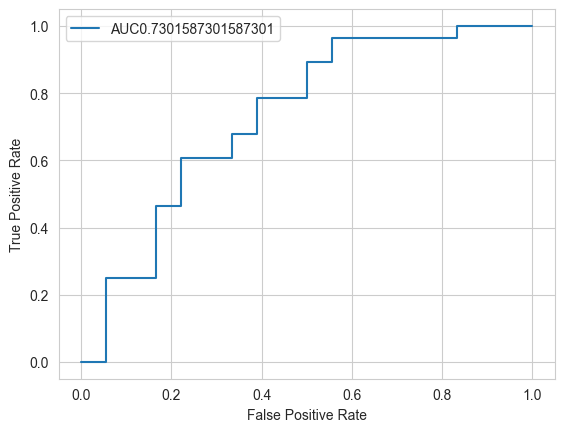

In [54]:
plt.plot(fpr,tpr,label="AUC"+str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()